In [2]:
from sklearn.model_selection import train_test_split # importa a biblioteca
# para dividir os dados em treino e teste
import numpy as np # biblioteca para trabalhar com arrays
from sklearn.tree import DecisionTreeClassifier # importa o modelo 
from sklearn import tree
#arvore de decisão
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns # importa biblioteca seaborn para plotar gráficos

In [3]:
data = pd.DataFrame({
    'Idade': [5,10,3,8,1,15],
    'histoManu':[2,0,3,1,3,0], # ruim = 0 regular = 1 bom = 2 excelente = 3
    'falhasAnte': [0,3,0,2,0,5],
    'Nivel':[2,0,1,2,1,0],  # 0 = baixa #  1 = média #  2 = alta 
    'Classif':['Segura','Não segura','Segura','Não segura','Segura','Não Segura'] 
})

Acurácia: 1.0


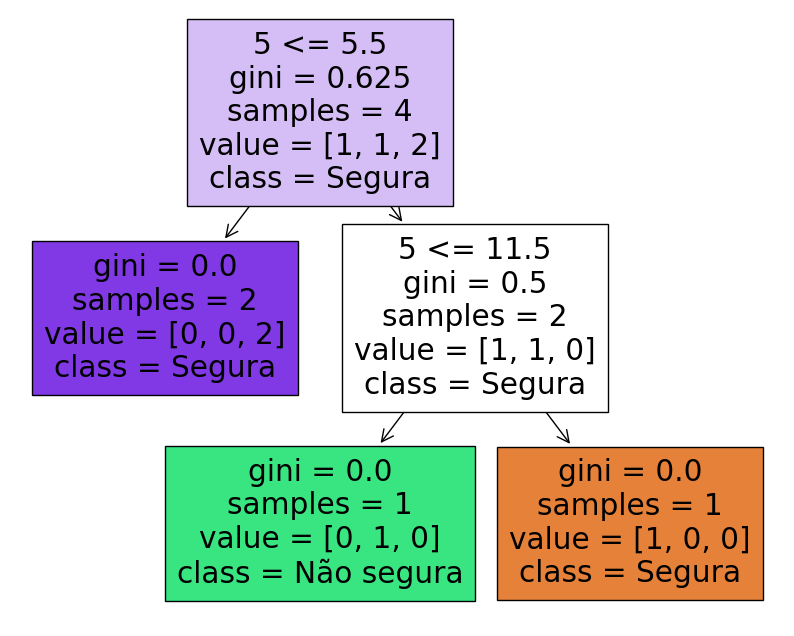

In [4]:
x=np.array(data['Idade']) # pega a coluna de tempo do dataframe
y=np.array(data['Classif']) # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
#precisao = precision_score(y_teste,prev,pos_label='Não segura') # pós label rótulo
matrix = confusion_matrix(y_teste,prev)
print(f'Acurácia: {acurracy}')
#print(f'Precisão: {precisao}')
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.savefig('EXERCÍCIO 02 (ÁrvoreDecisão).jpg')
plt.show()

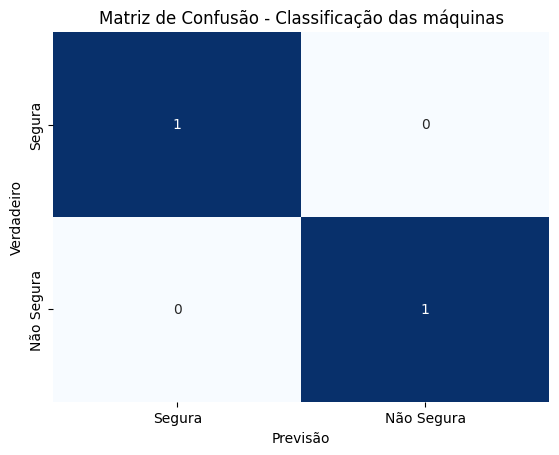

In [6]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Segura','Não Segura'],yticklabels=['Segura','Não Segura'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.savefig('EXERCÍCIO 02 (Matriz de Confusão).jpg')
plt.show()